In [1]:
import func.backtest as bt
import itertools
from func.operators import *
from os import path

In [2]:
filepath = path.abspath('sample_data')
logpath = path.abspath('log\\')

open = bt.get_intra_data('open', path=filepath)
close = bt.get_intra_data('close', filepath)
high = bt.get_intra_data('high', filepath)
low = bt.get_intra_data('low', filepath)

midp_twa = bt.get_intra_data('midp_twa', filepath)
spread_twa = bt.get_intra_data('spread_twa', filepath)

volume = bt.get_intra_data('volume', filepath)
traded_value = bt.get_intra_data('traded_value', filepath)
vwap = traded_value/volume

hit_volume = bt.get_intra_data('hit_volume', filepath)
hit_value = bt.get_intra_data('hit_value', filepath)
num_hits = bt.get_intra_data('num_hits', filepath)

lift_volume = bt.get_intra_data('lift_volume', filepath)
lift_value = bt.get_intra_data('lift_value', filepath)
num_lifts = bt.get_intra_data('num_lifts', filepath)

In [3]:
account = 100000
results = []
test_size = 10

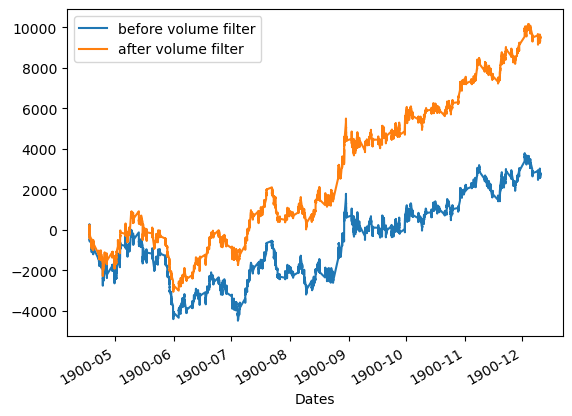

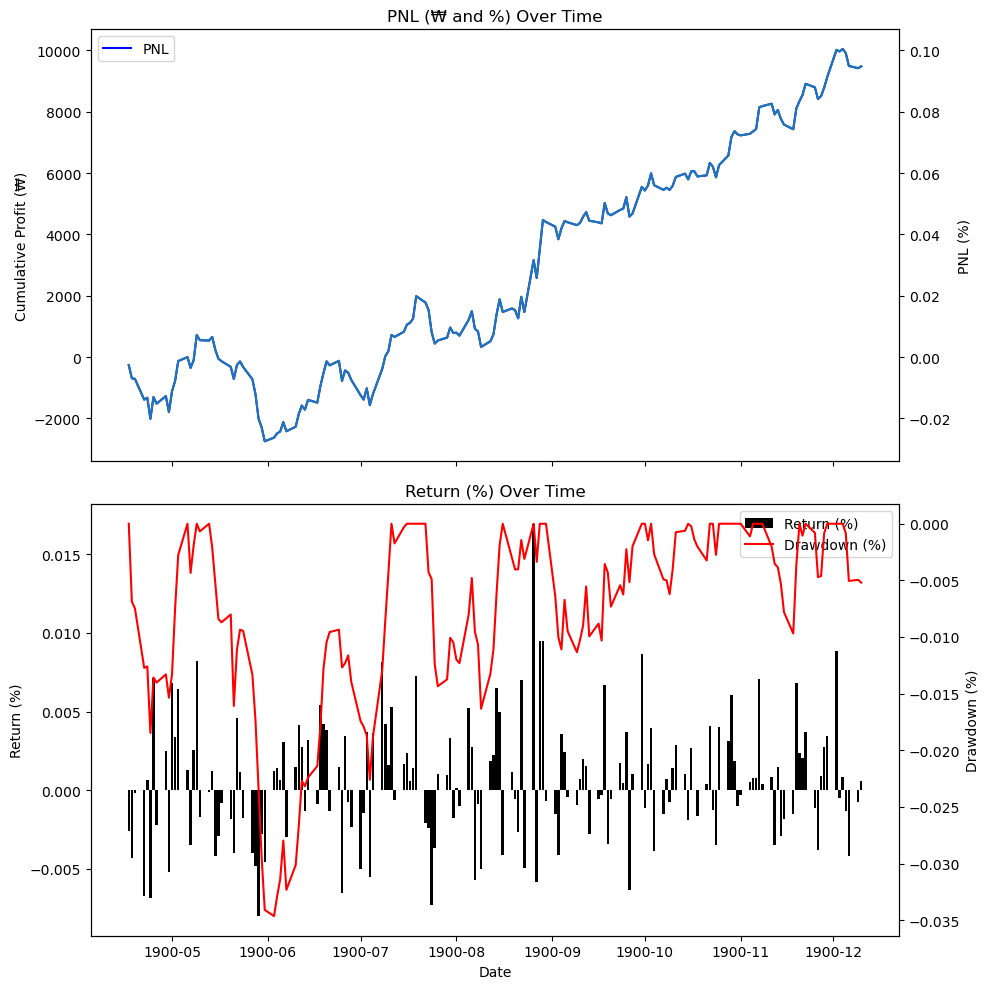

,returns(%),sharpe,sortino,drawdown(%),turnover,fitness,margin(‱),long_count,short_count
Total,9.481698,2.041678,2.667201,-3.972887,50.442095,0.088518,0.110572,38.636756,58.988146
4,-1.795473,-5.540742,-7.092746,-2.528787,49.366170,-0.105668,-0.363705,39.283939,59.106667
5,-0.951882,-1.370763,-1.750782,-3.972887,49.774905,-0.018956,-0.083147,39.177470,59.154545
6,2.003483,4.130122,5.582446,-3.914484,54.310340,0.079326,0.184448,38.725000,59.184242
7,1.526728,2.795631,4.215615,-2.647782,51.460022,0.048153,0.128992,38.790909,59.201318
8,3.620604,5.008323,7.325084,-2.076100,50.267727,0.134412,0.327393,38.757300,59.150413
9,1.145994,1.885098,2.245598,-1.818827,49.632684,0.028644,0.109950,39.094084,59.132179
10,1.713481,3.258241,4.191831,-1.158174,50.807899,0.059835,0.146629,38.368248,59.292490
11,1.868158,3.587119,4.584777,-1.263394,47.508334,0.071132,0.187251,37.247908,57.584848
12,0.350605,2.006708,2.203756,-1.023280,50.350171,0.016745,0.099476,38.474892,59.279221


In [4]:
# Volatility Risk Premium over Liquidity
# Higher volatility over liquidity -> Long
def strategy1(param):
    x = (ts_mean((high-low)/(spread_twa), param))
    weight = bt.get_neutral_weight(quantile(x, 5), roll=1)
    weight[0] = 0
    return weight

params = [10, 20, 30]
result, statistics = bt.strategy_pipeline(strategy1, params, account, vwap, volume, test_size, overnight=False, logpath=logpath)
statistics

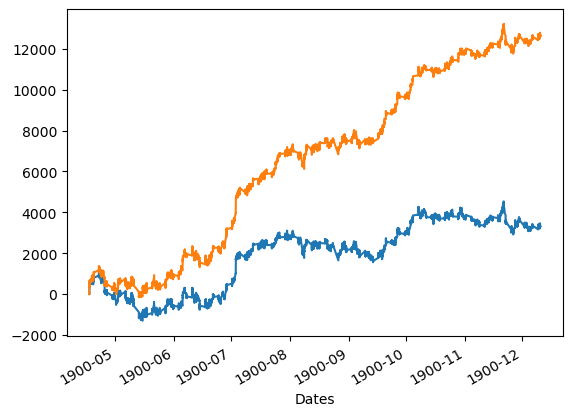

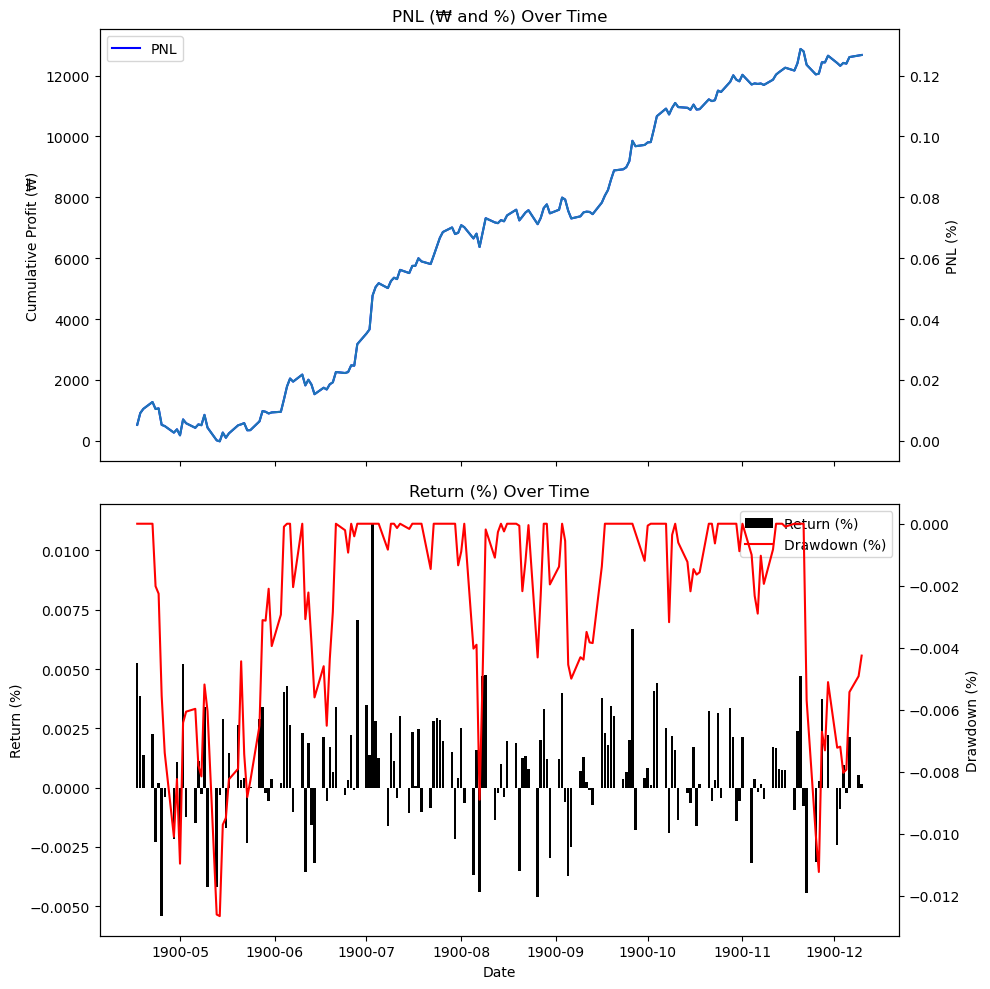

,returns(%),sharpe,sortino,drawdown(%),turnover,fitness,margin(‱),long_count,short_count
Total,12.675014,4.345465,5.259399,-1.533567,85.763283,0.167055,0.086936,31.036649,55.304385
4,0.376241,2.135855,2.594924,-1.209429,88.258185,0.013945,0.042630,32.382424,55.676667
5,0.555460,1.351324,1.715313,-1.533567,86.215705,0.010847,0.028012,31.974177,55.500791
6,2.243205,6.484058,8.050163,-1.019876,86.554305,0.104385,0.129584,32.000606,55.792727
7,3.658416,10.241439,15.936703,-0.429659,86.477498,0.210647,0.183934,31.781555,55.973123
8,0.638628,1.437811,1.372275,-1.205438,86.991219,0.012319,0.033369,30.959229,55.346832
9,2.247634,6.030483,7.325527,-0.881289,87.033136,0.096911,0.122976,31.444012,55.271717
10,2.090033,6.114116,9.614596,-0.582650,84.921660,0.095918,0.107006,30.034914,54.867852
11,0.842357,2.502177,3.256950,-1.450667,81.219090,0.025482,0.049388,28.632756,54.395238
12,0.023039,0.194685,0.208251,-1.082706,84.834964,0.000321,0.003880,30.356277,54.661039


In [ ]:
# Liquidity Premia 
# spread decrease -> short & spread increase -> long
def strategy2(param):
    x = ts_mean(1/spread_twa.diff(param[0]), param[1])
    weight = bt.get_neutral_weight(quantile(x, 5), roll=1)
    weight[0] = 0
    return weight

params = itertools.product([60, 120, 300], [10, 20, 30])
result, statistics = bt.strategy_pipeline(strategy2, params, account, vwap, volume, test_size, overnight=False, logpath=logpath)
statistics

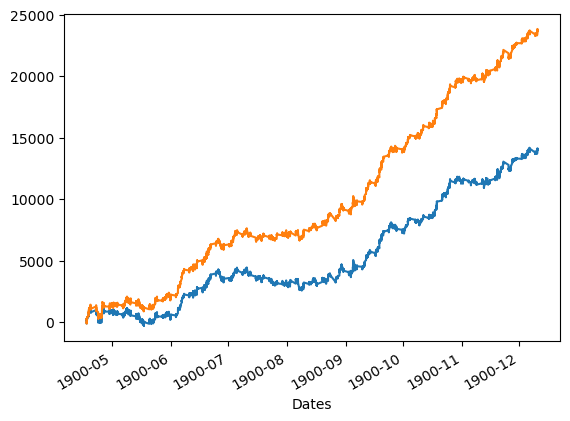

In [ ]:
# Volume Momentum
# More volume than average -> long
def strategy3(param):
    x = ts_mean(volume/ts_mean(volume, 100), param)
    weight = bt.get_neutral_weight(quantile(x, 5), roll=1)
    weight[0] = 0
    return weight

params = [10, 20, 30]
result, statistics = bt.strategy_pipeline(strategy3, params, account, vwap, volume, test_size, overnight=False, logpath=logpath)
statistics

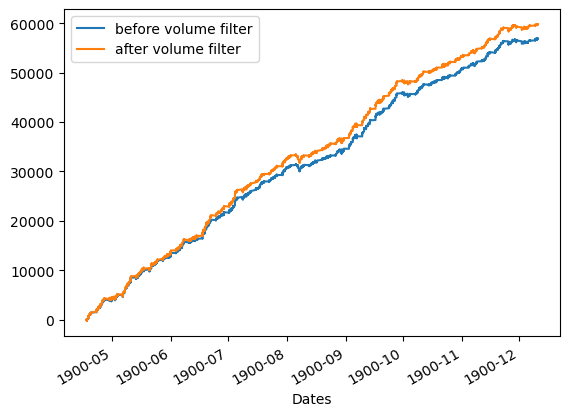

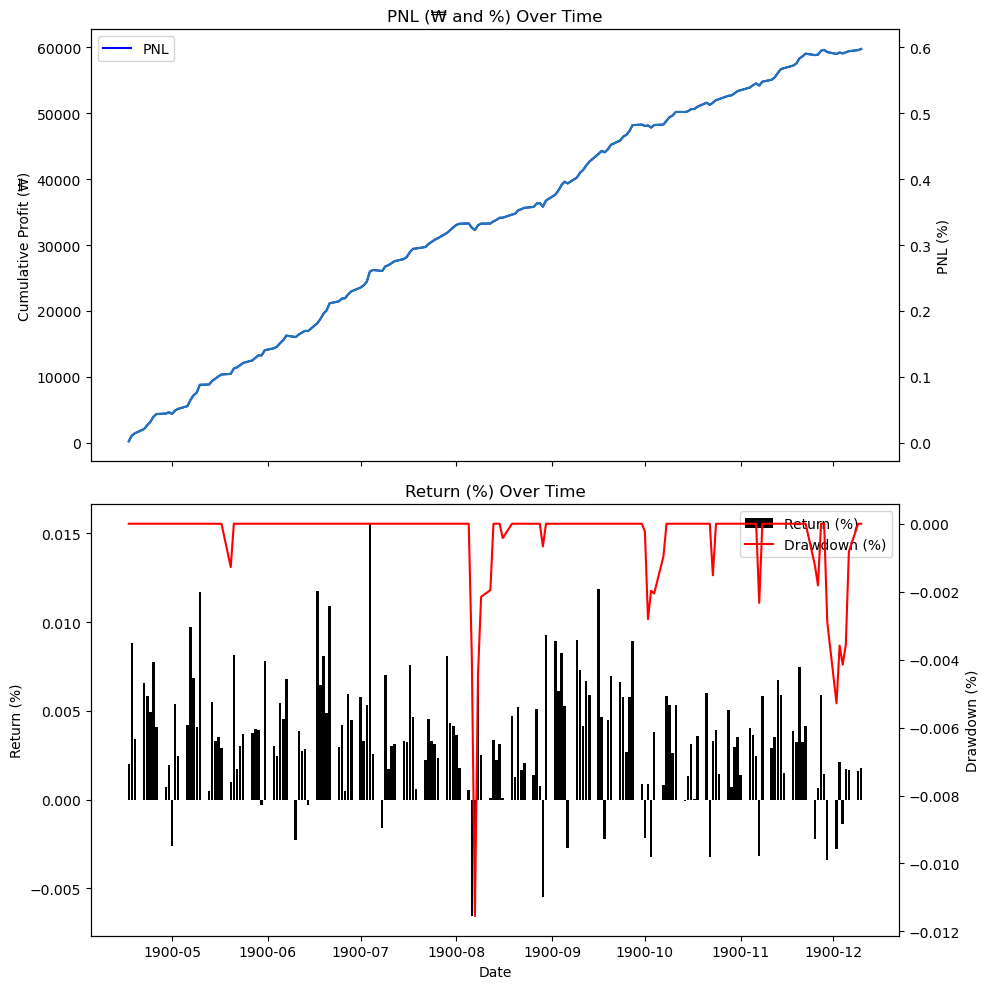

,returns(%),sharpe,sortino,drawdown(%),turnover,fitness,margin(‱),long_count,short_count
Total,59.776995,17.781014,25.319777,-1.750203,61.681387,1.750437,0.570074,35.155437,58.788485
4,4.613779,22.160782,32.867944,-0.473204,64.870449,0.591004,0.711230,36.259697,58.961818
5,9.417350,19.570810,31.119300,-0.614107,63.314834,0.754780,0.646689,35.857049,58.949407
6,8.939572,22.748702,34.577946,-0.477214,63.147944,0.855924,0.707828,35.419545,58.941818
7,9.723617,22.291720,36.583843,-0.638425,62.818522,0.877028,0.672996,35.269960,59.022925
8,4.066222,8.604741,9.699396,-1.750203,62.032334,0.220305,0.297955,35.044490,59.019146
9,11.534251,28.066295,43.001659,-0.761765,64.005108,1.191441,0.858135,35.611688,59.023810
10,5.085850,12.360160,19.546752,-0.834437,59.159878,0.362403,0.373773,34.619763,59.075099
11,5.920173,14.562382,19.477301,-0.828121,56.743320,0.470373,0.496821,33.715440,57.311977
12,0.476181,3.511882,4.514186,-0.986803,58.857091,0.031588,0.115578,35.201732,58.860606


In [5]:
# Reversion
# if close > open, price increased during interval -> it would decrease -> short signal
def strategy4(param):
    x = (ts_sum((open-close)/(vwap), param))
    weight = bt.get_neutral_weight(quantile(x, 5), roll=1)
    weight[0] = 0
    return weight

params = [30, 60, 120]
result, statistics = bt.strategy_pipeline(strategy4, params, account, vwap, volume, test_size, overnight=False, logpath=logpath)
statistics

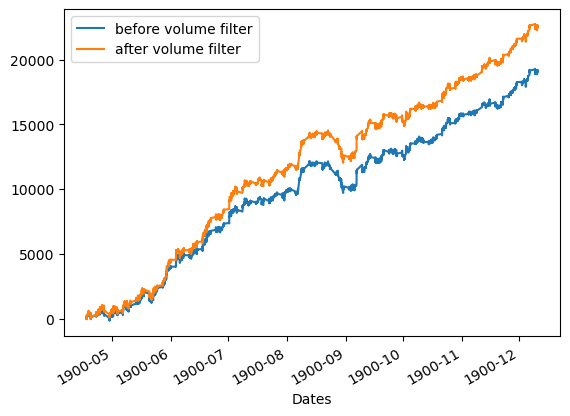

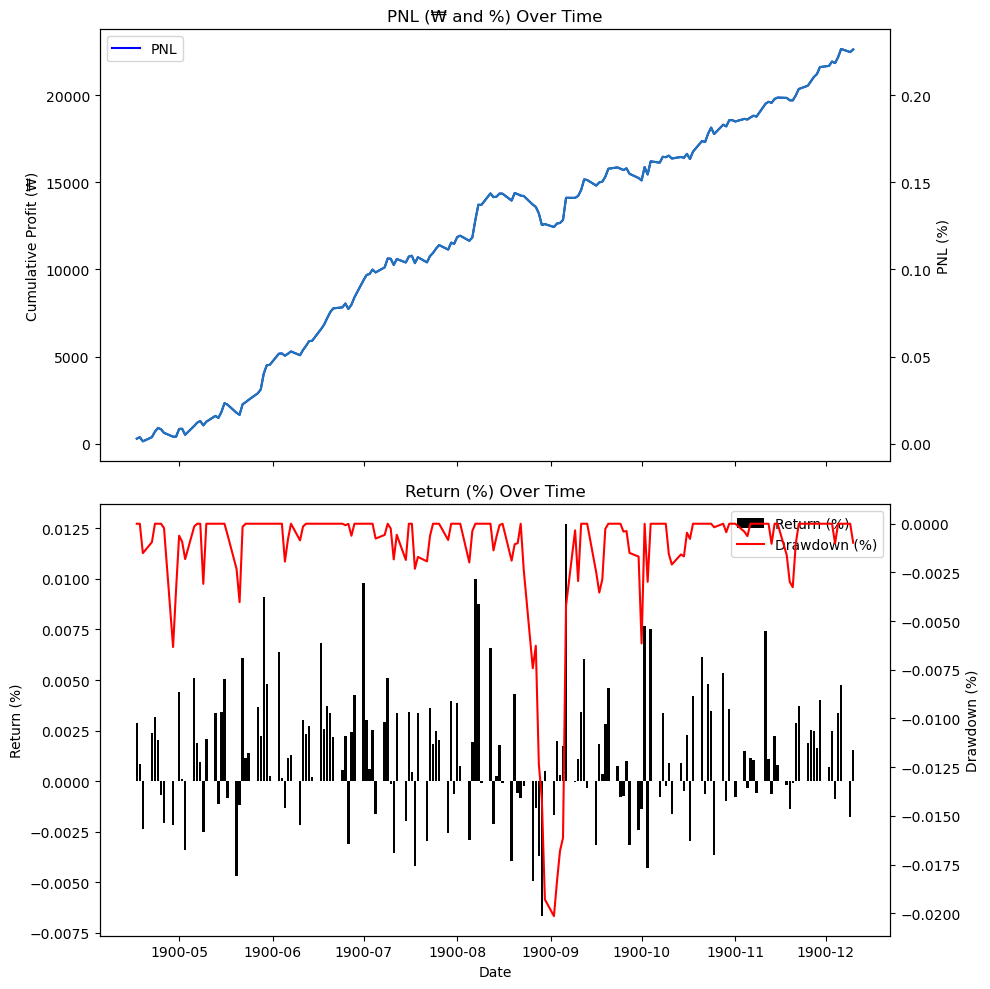

,returns(%),sharpe,sortino,drawdown(%),turnover,fitness,margin(‱),long_count,short_count
Total,22.628437,6.987694,9.463298,-2.502888,50.305834,0.468654,0.264598,35.428734,57.499198
4,0.398823,1.955581,2.537733,-0.939975,54.131476,0.016786,0.073677,35.983333,57.836970
5,4.125580,9.244538,11.905529,-0.862965,52.787932,0.258440,0.339799,35.849275,57.851910
6,3.872945,11.460690,18.100125,-0.686479,52.553389,0.311122,0.368477,35.694091,58.108636
7,3.075190,7.608296,10.000399,-0.680836,51.796045,0.185385,0.258135,35.816864,57.945850
8,1.130909,2.059061,2.574912,-2.502888,43.751123,0.033105,0.117494,35.632645,58.001240
9,2.644384,6.601773,9.596077,-2.378176,51.268449,0.149933,0.245615,35.518326,57.722799
10,3.321840,8.453796,11.840706,-0.989315,50.245106,0.217367,0.287447,34.866403,57.004348
11,3.045034,8.639749,13.044809,-0.612582,48.264598,0.217012,0.300431,34.216595,55.660895
12,1.013732,8.419578,12.728594,-0.563351,49.403098,0.120608,0.293137,35.795671,57.541126


In [6]:
# Reversion
# if x is high value, open and close prices are nearer to low than high -> long signal
def strategy5(param):
    x = ts_mean(((high + low) / (open + close)), param)
    weight = bt.get_neutral_weight(quantile(x, 5), roll=1)
    weight[0] = 0
    return weight

params = [30, 60, 120]
result, statistics = bt.strategy_pipeline(strategy5, params, account, vwap, volume, test_size, overnight=False, logpath=logpath)
statistics

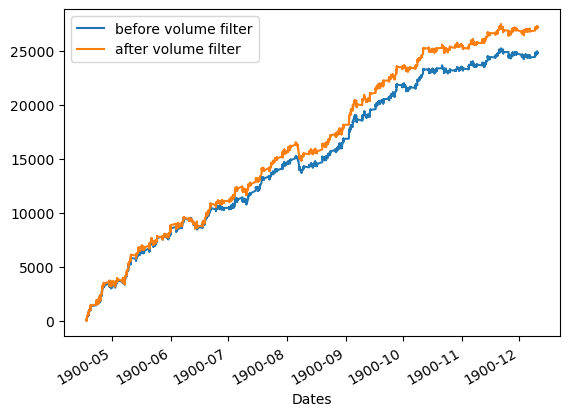

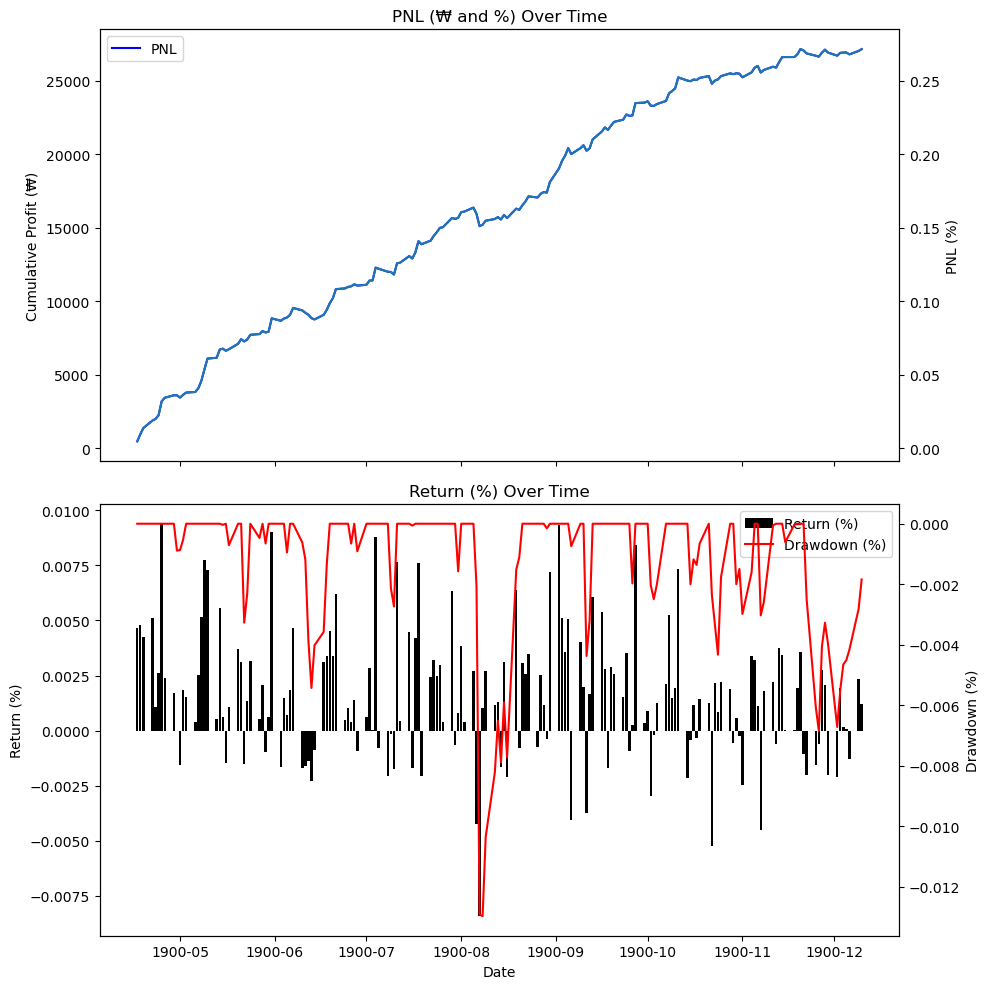

,returns(%),sharpe,sortino,drawdown(%),turnover,fitness,margin(‱),long_count,short_count
Total,27.154898,8.428361,11.724303,-1.737664,59.654327,0.568652,0.267767,35.217148,58.821943
4,3.601842,16.780681,26.862016,-0.551070,62.998714,0.401242,0.571733,36.284242,59.002424
5,5.233897,11.862282,17.982471,-0.655498,61.625292,0.345702,0.369265,35.876680,58.950461
6,2.228276,6.180936,8.961323,-1.073464,61.890953,0.117280,0.180016,35.399394,58.964697
7,4.615633,10.777976,17.562296,-0.825108,61.415824,0.295470,0.326756,35.351910,59.017787
8,2.431979,4.786997,5.447725,-1.737664,60.842865,0.095706,0.181689,35.032231,59.036088
9,5.406668,13.402759,20.886017,-0.677279,55.198696,0.419464,0.466425,35.998413,58.932179
10,1.968456,5.400944,8.157220,-0.777061,58.522670,0.099054,0.146243,34.870487,59.111989
11,1.435181,3.948922,5.054657,-1.108882,56.314193,0.063041,0.121358,33.597835,57.529582
12,0.232966,1.991035,2.527653,-1.058908,59.592660,0.012449,0.055847,34.796537,59.010823


In [7]:
# Reversion
# if vwap > open, it is increasing -> short signal
def strategy6(param):
    x = ts_mean(rank( -(vwap - open) / (vwap + open)), param)
    weight = bt.get_neutral_weight(quantile(x, 5), roll=1)
    weight[0] = 0
    return weight

params = [30, 60, 120]
result, statistics = bt.strategy_pipeline(strategy6, params, account, vwap, volume, test_size, overnight=False, logpath=logpath)
statistics

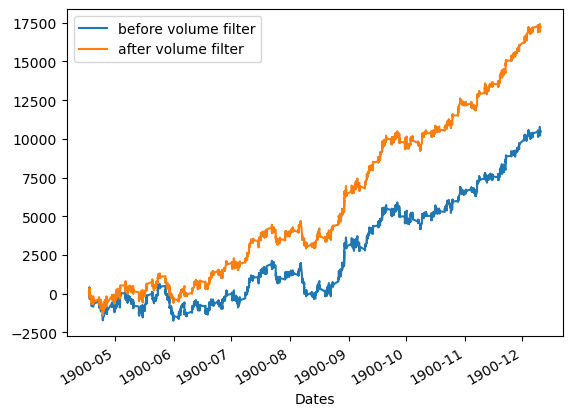

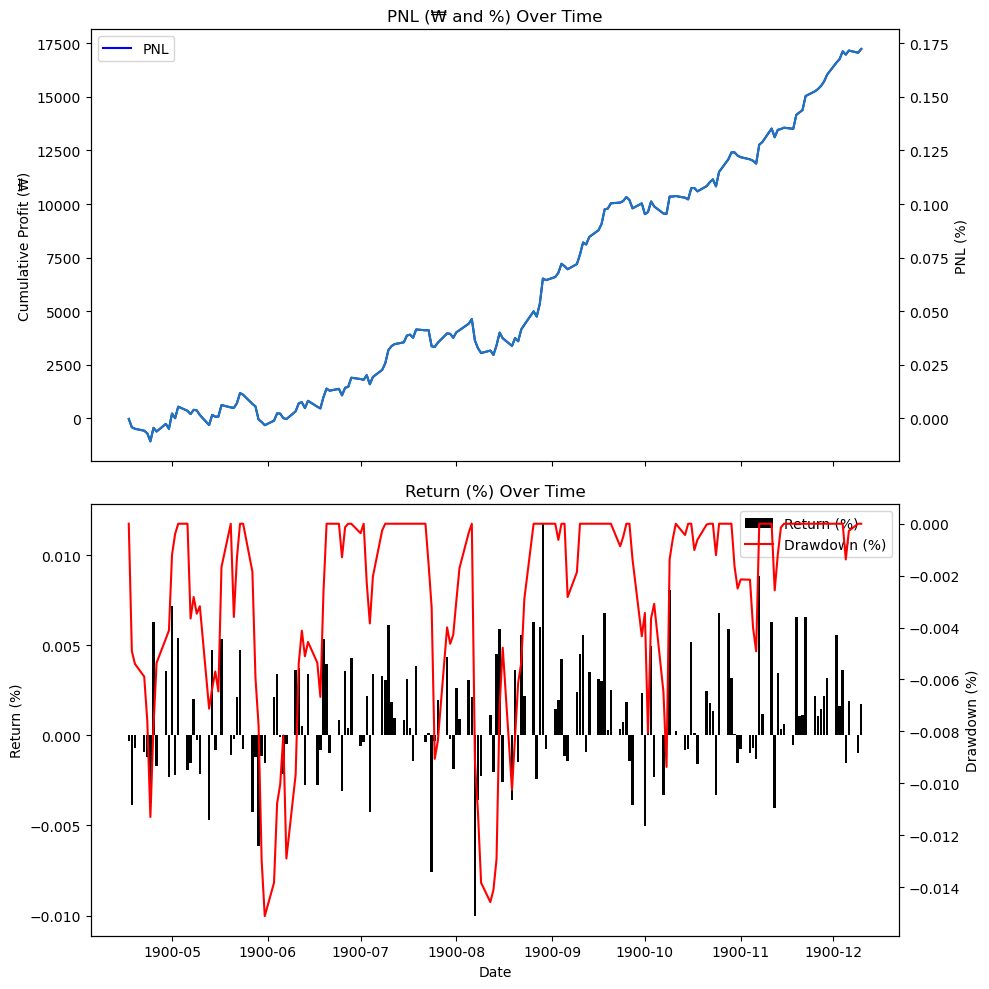

,returns(%),sharpe,sortino,drawdown(%),turnover,fitness,margin(‱),long_count,short_count
Total,17.238842,4.755641,6.713042,-1.912032,72.025813,0.232659,0.140790,37.495561,59.454617
4,-0.497157,-1.806674,-2.836054,-1.779462,59.692710,-0.016488,-0.083286,38.765758,59.141212
5,0.170023,0.322847,0.454004,-1.912032,59.849692,0.001721,0.012351,38.569697,59.232675
6,2.216917,5.293784,8.631817,-1.830091,63.281510,0.099084,0.175163,38.072727,59.273636
7,1.865196,4.359322,6.926920,-1.304765,84.537885,0.064752,0.095928,37.235968,59.977997
8,2.692460,5.059735,5.780935,-1.779387,77.359494,0.094394,0.158202,37.452342,59.735537
9,3.582990,7.885962,11.628990,-1.160551,95.791996,0.152515,0.178114,37.224387,60.092785
10,2.229183,5.273747,7.747445,-1.266620,76.981995,0.089742,0.125901,36.854414,59.925428
11,3.786042,9.603030,15.075897,-0.765397,55.728964,0.250300,0.323508,36.395094,57.996970
12,1.193188,8.158749,10.901348,-0.484993,58.068830,0.116952,0.293540,37.712987,59.457576


In [8]:
# Momentum
# if high - vwap is large, it is increasing -> long signal
def strategy7(param):
    x = -ts_mean(rank((vwap - high) / (vwap + low)), param)
    weight = bt.get_neutral_weight(quantile(x, 5), roll=1)
    weight[0] = 0
    return weight

params = [5, 10, 20]
result, statistics = bt.strategy_pipeline(strategy7, params, account, vwap, volume, test_size, overnight=False, logpath=logpath)
statistics


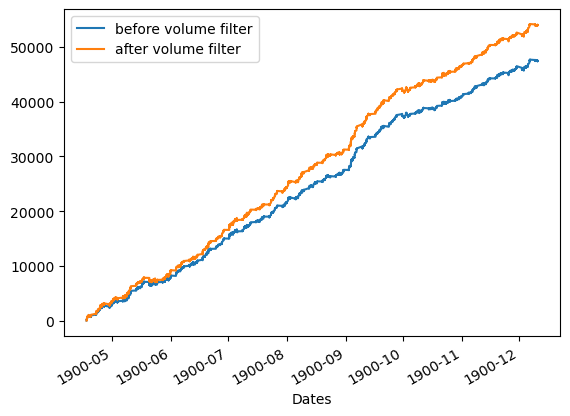

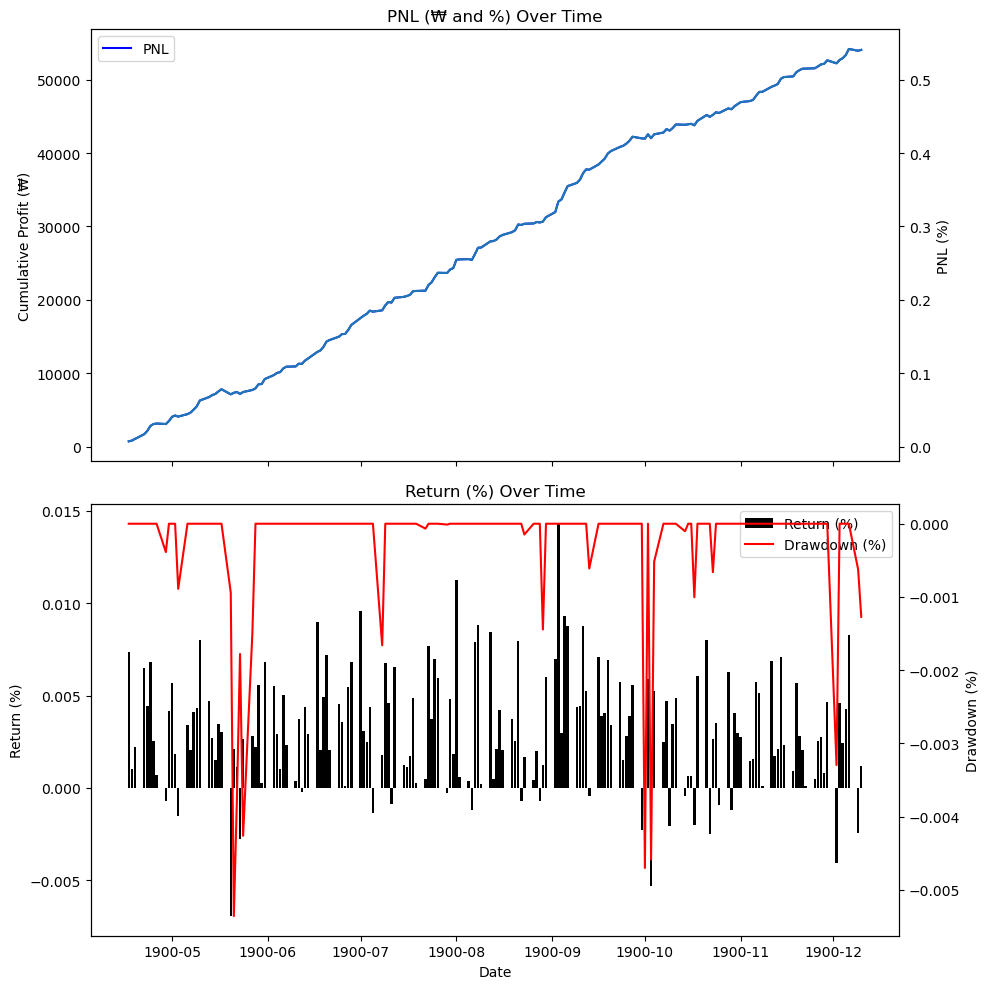

,returns(%),sharpe,sortino,drawdown(%),turnover,fitness,margin(‱),long_count,short_count
Total,54.042623,17.442598,26.693030,-0.876547,44.347545,1.925505,0.716833,34.446863,58.778449
4,3.505845,17.510202,26.695881,-0.431203,46.390860,0.481361,0.755719,35.270909,58.929091
5,5.710509,13.813650,20.977604,-0.876547,44.509416,0.494789,0.557821,35.079315,58.957971
6,7.363975,20.944922,38.465781,-0.460864,45.751609,0.840295,0.804778,34.845000,58.925455
7,7.746502,18.541819,24.687704,-0.519171,44.780023,0.771193,0.752131,34.755204,58.986825
8,6.932914,15.743623,28.875368,-0.475234,43.992949,0.624987,0.716325,34.669559,58.953994
9,10.731303,26.133414,45.009300,-0.511775,45.803824,1.264945,1.115659,35.026696,59.007071
10,4.666199,12.431595,16.199392,-0.763855,43.206789,0.408538,0.469552,33.895125,59.012516
11,5.960040,17.424596,27.416394,-0.555985,42.238874,0.654532,0.671920,32.444877,57.407648
12,1.425336,10.364454,12.752558,-0.769851,42.283869,0.190291,0.481554,34.420346,58.974459


In [9]:
# Order direction 
# more lift_volume/hit_volume refers upward/downward signal
def strategy8(param):
    x = ts_mean((hit_volume-lift_volume)/volume, param)
    weight = bt.get_neutral_weight(quantile(x, 5), roll=1)
    weight[0] = 0
    return weight

params = [30, 60, 120]
result, statistics = bt.strategy_pipeline(strategy8, params, account, vwap, volume, test_size, overnight=False, logpath=logpath)
statistics

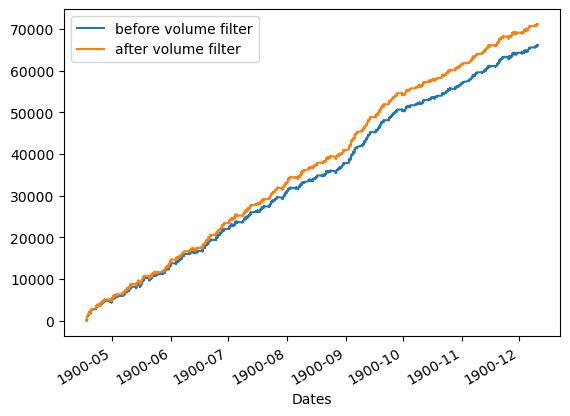

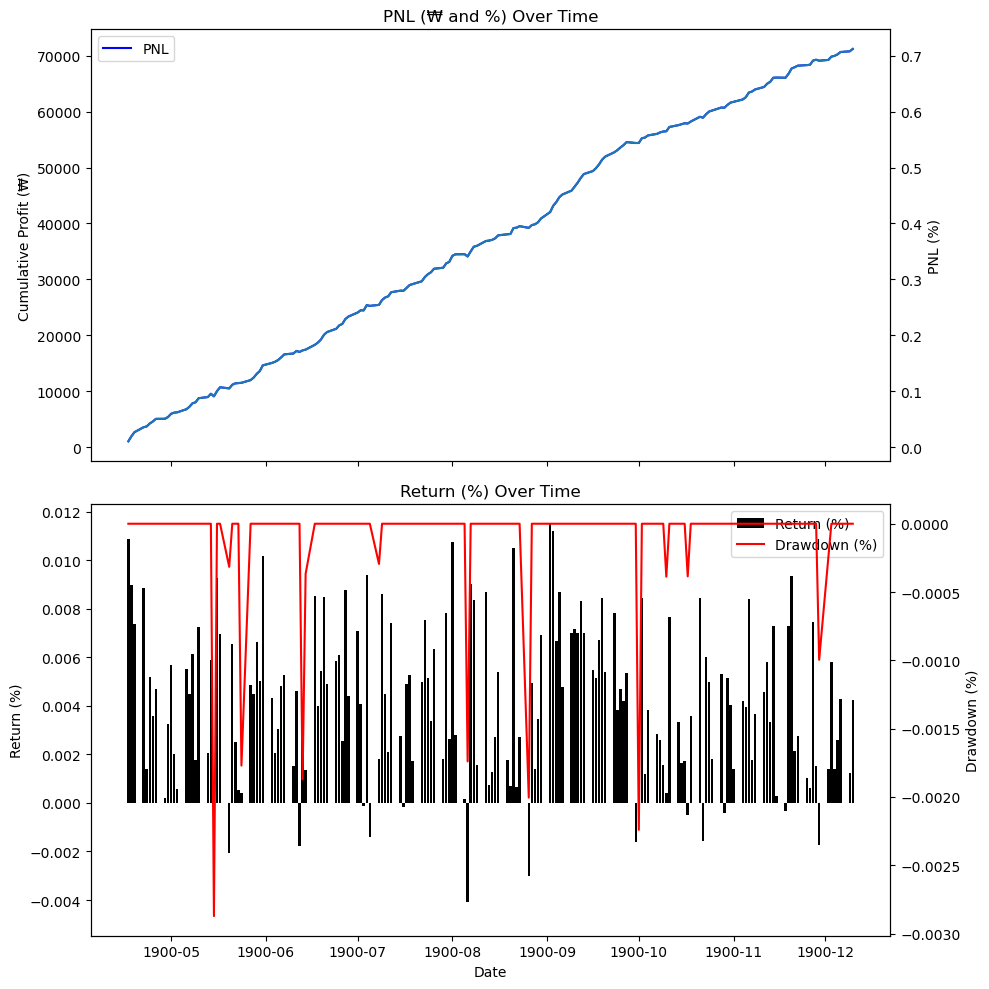

,returns(%),sharpe,sortino,drawdown(%),turnover,fitness,margin(‱),long_count,short_count
Total,71.178202,22.822330,34.228024,-0.750467,55.661650,2.580807,0.752215,34.406078,59.022745
4,5.442410,26.489369,42.274293,-0.425923,57.649779,0.813895,0.944047,35.273030,59.119697
5,9.217830,21.054527,29.478551,-0.750467,56.522414,0.850256,0.709055,35.044532,59.222398
6,8.717037,25.324744,38.459853,-0.730082,57.676152,0.984535,0.755688,34.670606,59.189242
7,9.763080,23.986052,34.132294,-0.568575,56.206169,0.999678,0.755223,34.829513,59.229381
8,7.748699,16.636994,25.713480,-0.652041,56.017637,0.618767,0.628755,34.580165,59.213774
9,13.487760,33.401029,56.834325,-0.447671,57.232690,1.621465,1.122216,34.933045,59.154257
10,7.215114,19.761729,29.583606,-0.532043,53.695892,0.724396,0.584217,33.817918,59.249275
11,7.488259,21.775697,31.150163,-0.624730,52.256808,0.824311,0.682368,32.661183,57.723088
12,2.098013,15.982611,22.671028,-0.366127,53.289909,0.317124,0.562426,33.961905,59.233333


In [10]:
# Order direction reversion
# more lift_volume/hit_volume refers upward/downward signal
def strategy9(param):
    d = param
    x = -(ts_mean(lift_volume, d)-ts_mean(hit_volume, d))/ts_mean(volume, d)
    weight = bt.get_neutral_weight(quantile(x, 5), roll=1)
    weight[0] = 0
    return weight

params = [30, 60, 120]
result,statistics = bt.strategy_pipeline(strategy9, params, account, vwap, volume, test_size, overnight=False, logpath=logpath)
statistics

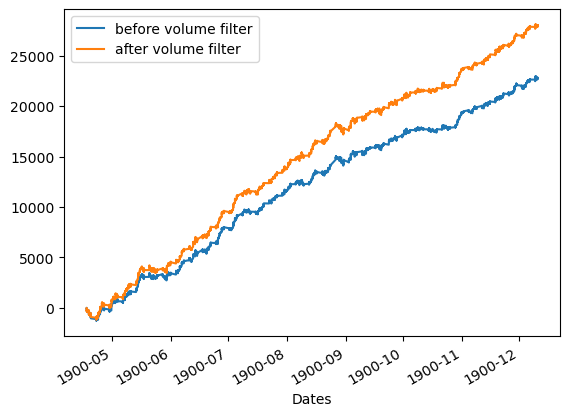

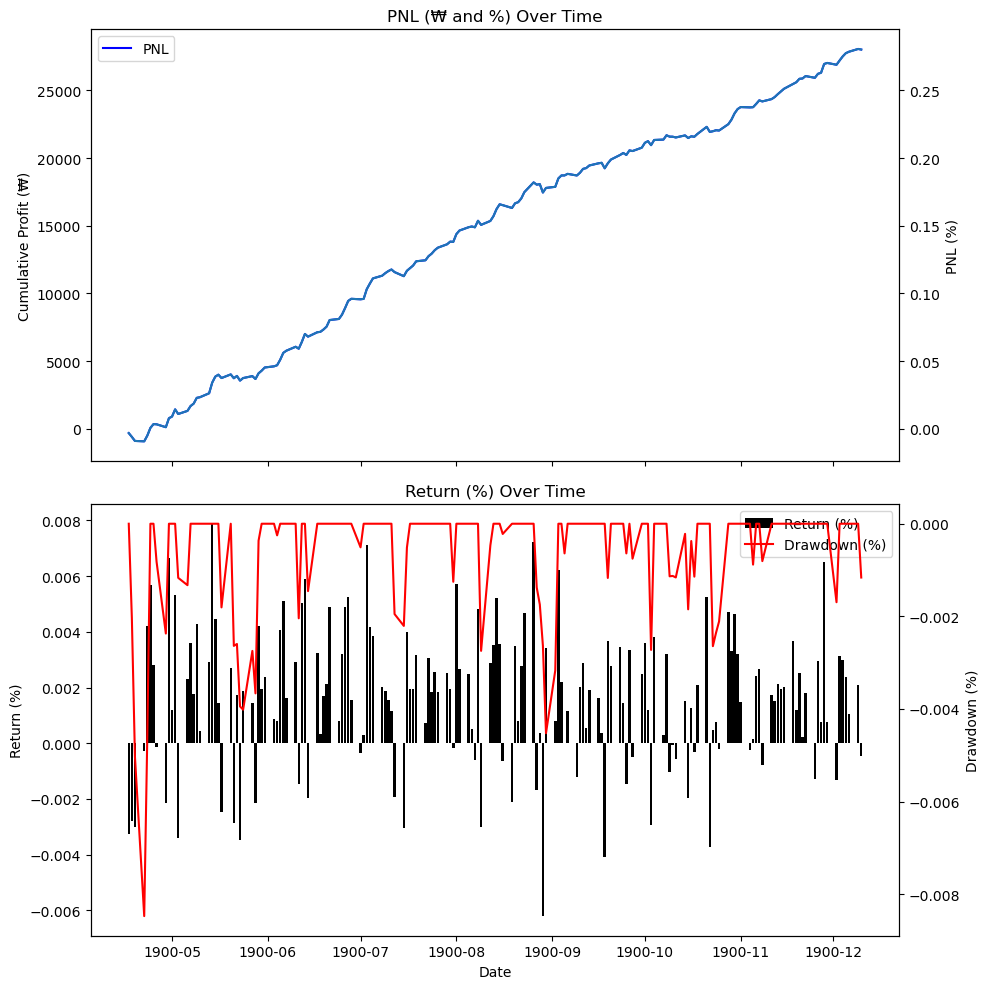

,returns(%),sharpe,sortino,drawdown(%),turnover,fitness,margin(‱),long_count,short_count
Total,28.026826,10.092558,13.816904,-1.174526,46.986514,0.779474,0.350874,34.982638,58.779929
4,0.775648,4.392743,7.077140,-1.174526,49.137620,0.055190,0.157852,35.894848,58.937576
5,3.748468,9.708415,14.845266,-0.770953,49.365819,0.267524,0.330141,35.456258,58.981028
6,5.077244,14.992922,23.441721,-0.525514,49.306002,0.481117,0.514871,35.481818,59.014545
7,4.209885,11.991912,17.927621,-0.542938,48.163586,0.354539,0.380035,35.339130,59.050461
8,3.987023,10.230826,12.432156,-1.106771,49.159868,0.291360,0.368651,34.975620,58.982507
9,2.974384,8.489361,10.638765,-0.723701,48.504035,0.210225,0.292011,35.629582,59.000289
10,2.853830,8.180179,10.376913,-0.501807,41.525730,0.214446,0.298802,34.459420,58.957839
11,3.410718,10.368437,13.447671,-0.293790,42.342810,0.294270,0.383572,33.165657,57.258009
12,0.989625,9.744008,13.992380,-0.383246,46.091735,0.142778,0.306725,34.777056,59.018182


In [11]:
# Order direction
# higher transaction volume per order refers strong directional signal
def strategy10(param):
    d = param
    x = (ts_mean(lift_value/num_lifts, d)) - (ts_mean(hit_value/num_hits, d))
    weight = bt.get_neutral_weight(quantile(x, 5), roll=1)
    weight[0] = 0
    return weight

params = [30, 60, 120]
result,statistics = bt.strategy_pipeline(strategy10, params, account, vwap, volume, test_size, overnight=False, logpath=logpath)
statistics

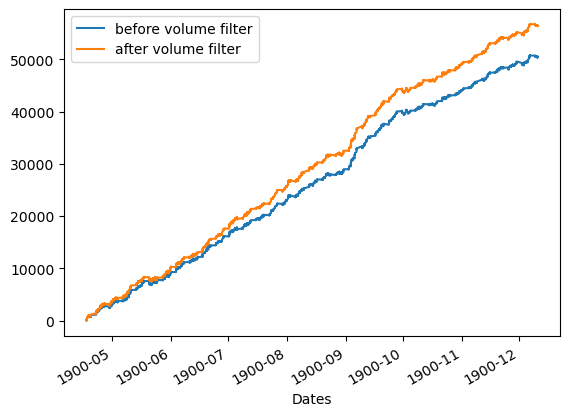

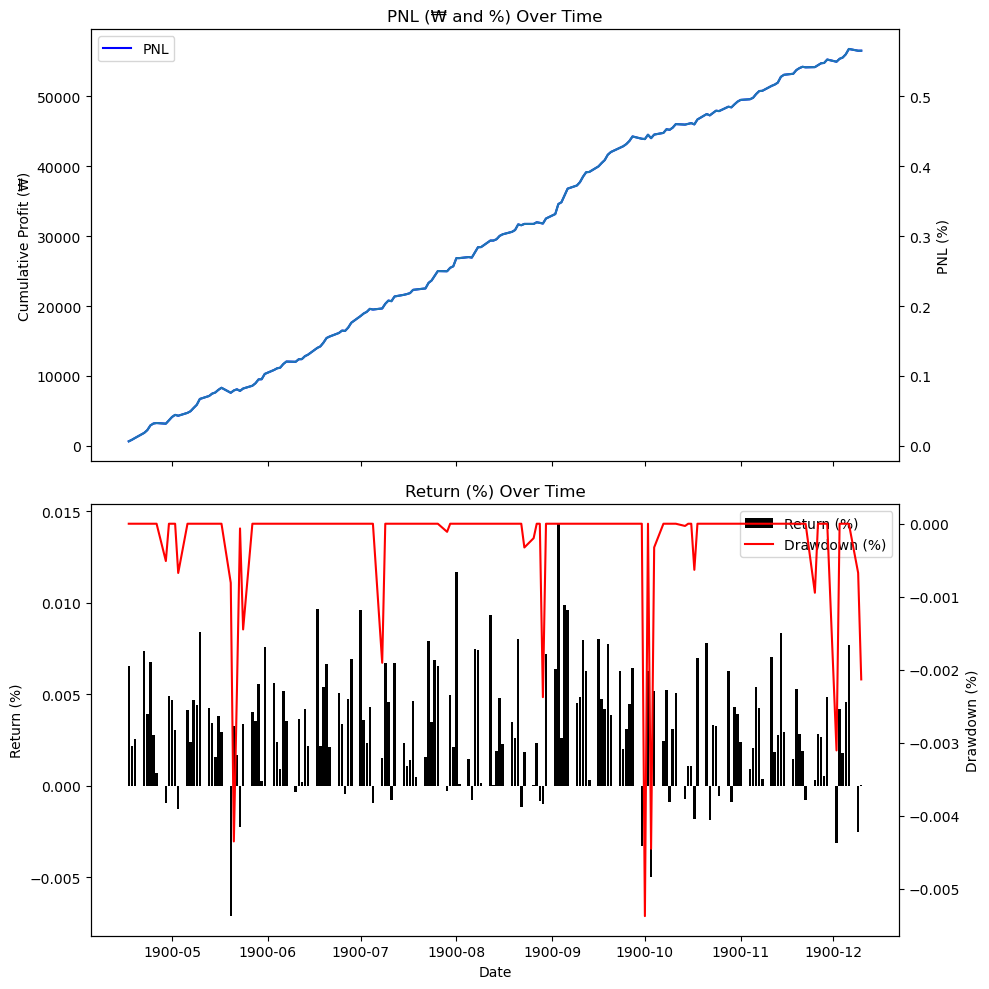

,returns(%),sharpe,sortino,drawdown(%),turnover,fitness,margin(‱),long_count,short_count
Total,56.530680,17.807625,27.528688,-0.895179,44.046168,2.017409,0.754966,34.793797,58.643191
4,3.667852,17.720038,27.334575,-0.445434,45.671257,0.502168,0.803099,35.633636,58.818788
5,6.627972,15.787690,24.170146,-0.895179,44.328065,0.610477,0.650091,35.380501,58.850725
6,7.320643,20.549094,36.632237,-0.443289,45.661611,0.822795,0.801619,35.201212,58.800909
7,8.072216,18.922285,25.532782,-0.531869,44.445135,0.806414,0.789661,35.161792,58.847563
8,6.837925,15.331205,27.338319,-0.646089,43.462411,0.608109,0.715135,35.131818,58.828375
9,11.409702,26.577633,46.205081,-0.560691,45.733463,1.327506,1.188012,35.060462,58.945743
10,5.315351,13.690885,18.423078,-0.812161,42.974818,0.481494,0.537762,34.130435,58.877470
11,6.014240,17.096149,27.836017,-0.601687,41.821372,0.648320,0.684799,33.029293,57.146176
12,1.264779,9.047418,11.515018,-0.703285,41.839247,0.157304,0.431850,34.903896,58.819913


In [12]:
# Order direction
# higher transaction volume per order refers strong directional signal
def strategy11(param):
    d = param
    x = (ts_sum(hit_value/traded_value, d)) - (ts_sum(lift_value/traded_value, d))
    weight = bt.get_neutral_weight(quantile(x, 5), roll=1)
    weight[0] = 0
    return weight

params = [30, 60, 120]
result, statistics = bt.strategy_pipeline(strategy11, params, account, vwap, volume, test_size, overnight=False, logpath=logpath)
statistics

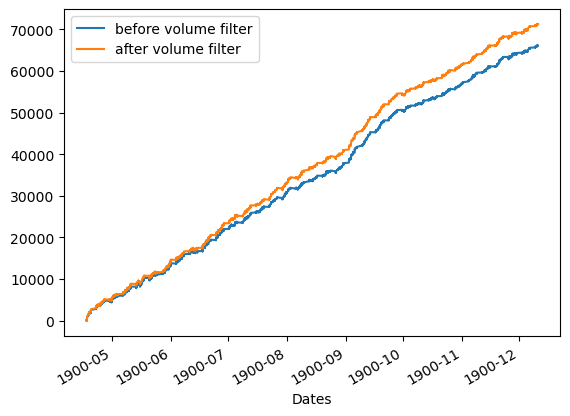

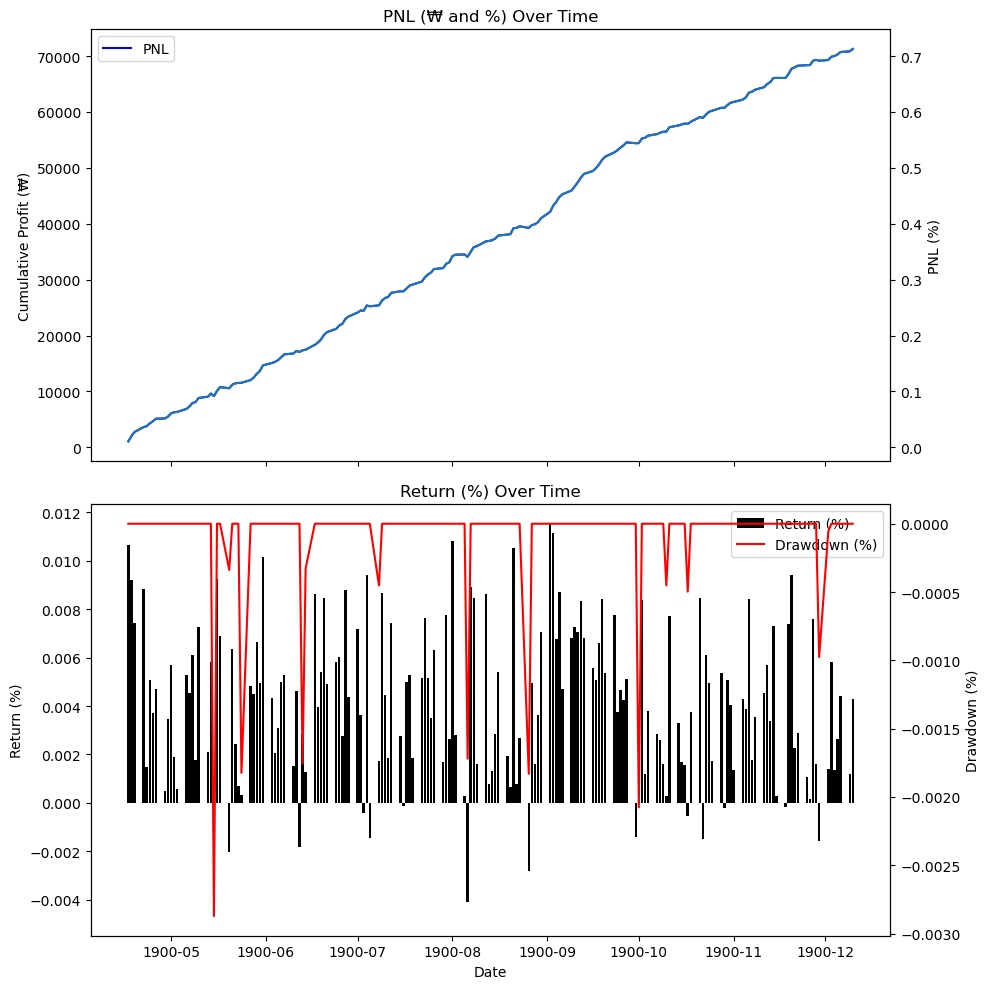

,returns(%),sharpe,sortino,drawdown(%),turnover,fitness,margin(‱),long_count,short_count
Total,71.275533,22.891452,34.276594,-0.751791,55.649110,2.590684,0.753413,34.406488,59.021569
4,5.511348,26.777885,42.899920,-0.406431,57.606666,0.828264,0.956721,35.274545,59.109091
5,9.140636,20.880724,29.260842,-0.751791,56.534207,0.839611,0.702971,35.045323,59.224242
6,8.738908,25.401820,38.617782,-0.725329,57.678670,0.988748,0.757551,34.668485,59.191970
7,9.711947,23.912743,33.577742,-0.574053,56.206255,0.994009,0.751266,34.828854,59.228327
8,7.875865,17.027577,26.300894,-0.633814,55.979214,0.638688,0.639512,34.581543,59.212810
9,13.432840,33.283398,56.452765,-0.436877,57.243464,1.612310,1.117436,34.934055,59.152670
10,7.234919,19.815745,29.672313,-0.512755,53.659377,0.727620,0.586219,33.818841,59.246904
11,7.514613,21.905098,31.409811,-0.611060,52.233074,0.830856,0.685081,32.662915,57.720635
12,2.114455,16.084497,22.812934,-0.367501,53.280335,0.320423,0.566935,33.959740,59.232468


In [13]:
# Order direction reversion
# higher transaction volume per order refers strong directional signal
def strategy12(param):
    d = param
    x = -(ts_sum(lift_value, d)-ts_sum(hit_value, d))/(ts_sum(traded_value, d)) 
    weight = bt.get_neutral_weight(quantile(x, 5), roll=1)
    weight[0] = 0
    return weight

params = [30, 60, 120]
result, statistics = bt.strategy_pipeline(strategy12, params, account, vwap, volume, test_size, overnight=False, logpath=logpath)
statistics

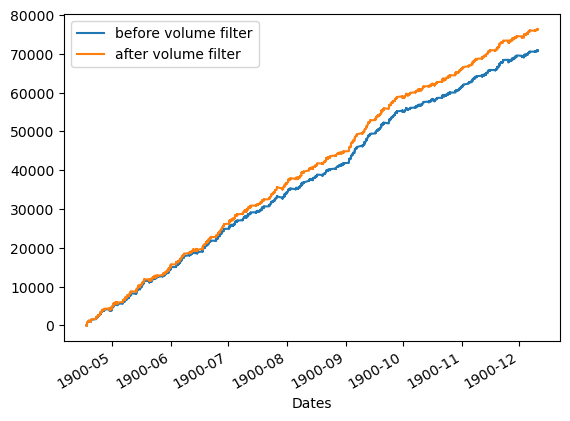

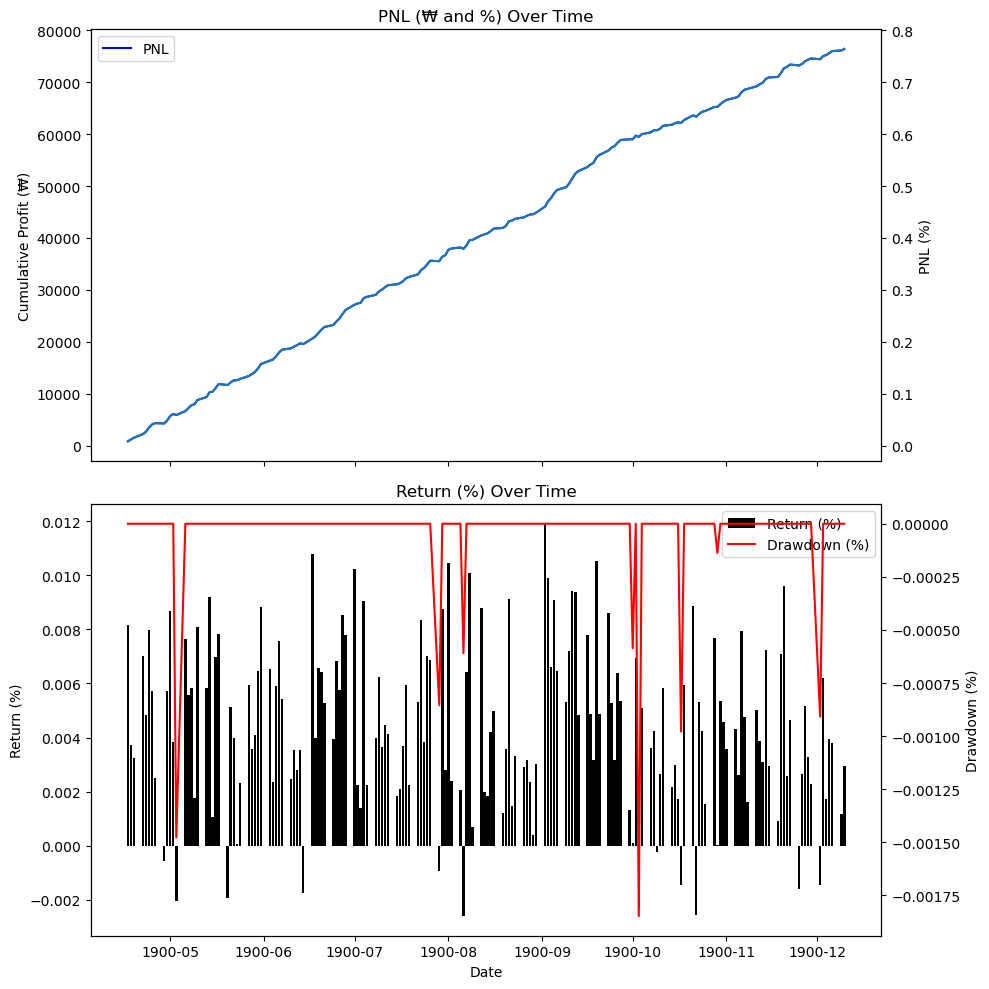

,returns(%),sharpe,sortino,drawdown(%),turnover,fitness,margin(‱),long_count,short_count
Total,76.417193,25.033127,39.564788,-0.689093,48.442339,3.144113,0.927934,34.626043,58.897326
4,4.835246,24.934225,45.477291,-0.580384,49.911495,0.776077,0.968764,35.467273,59.007879
5,10.865807,24.968034,40.252337,-0.582317,49.291280,1.172277,0.958438,35.176812,59.065086
6,10.425849,28.232820,50.642269,-0.536448,50.609210,1.281431,1.030035,34.972879,59.071212
7,10.549121,25.723623,33.882498,-0.631316,49.079711,1.192585,0.934515,35.077470,59.106324
8,8.184536,20.380672,32.449354,-0.475495,48.314103,0.838839,0.770012,34.828099,59.087328
9,14.150400,35.927442,62.459785,-0.330843,49.656321,1.917889,1.356984,35.178499,59.091053
10,7.225032,18.632813,28.293558,-0.589134,46.944027,0.730984,0.669163,33.986693,59.138208
11,8.344672,24.662263,39.260739,-0.689093,45.409717,1.057215,0.875067,32.818182,57.585281
12,1.836529,15.682040,22.500418,-0.431197,46.050863,0.313172,0.569721,34.372294,58.970996


In [14]:
# Order direction
# higher num_lifts refers -> upward & higher num_hits refers -> downward
def strategy13(param):
    d = param
    x = -(ts_sum(num_lifts-num_hits, d))/(ts_sum(num_lifts+num_hits, d))
    weight = bt.get_neutral_weight(quantile(x, 5), roll=1)
    weight[0] = 0
    return weight

params = [30, 60, 120]
result, statistics = bt.strategy_pipeline(strategy13, params, account, vwap, volume, test_size, overnight=False, logpath=logpath)
statistics

In [15]:
pnl_list = pd.concat([pd.read_csv(f'{logpath}\\strategy{i}_pnl.csv', index_col=0) for i in range(1, 14)], axis=1)
pnl_list.columns = range(1, 14)
pnl_list.corr()

,1,2,3,4,5,6,7,8,9,10,11,12,13
1,1.000000,-0.186491,0.121640,-0.088918,-0.280269,0.062454,0.690409,-0.147400,-0.140581,0.035926,-0.176939,-0.139604,-0.093676
2,-0.186491,1.000000,0.177014,0.071515,0.072202,0.019073,-0.033928,0.044829,0.037074,0.018384,0.053290,0.036892,0.014782
3,0.121640,0.177014,1.000000,-0.019859,0.025887,-0.028646,0.230514,-0.052707,-0.027761,-0.020090,-0.049369,-0.027350,-0.061440
4,-0.088918,0.071515,-0.019859,1.000000,0.020124,0.661937,-0.038817,0.205955,0.334737,0.115813,0.225419,0.336378,0.355080
5,-0.280269,0.072202,0.025887,0.020124,1.000000,-0.413890,-0.161910,0.461659,0.263583,0.130986,0.470717,0.262630,0.359618
6,0.062454,0.019073,-0.028646,0.661937,-0.413890,1.000000,0.073011,0.008909,0.165218,-0.025330,0.018488,0.166523,0.137506
7,0.690409,-0.033928,0.230514,-0.038817,-0.161910,0.073011,1.000000,-0.041226,-0.022741,-0.012572,-0.057343,-0.022927,0.016095
8,-0.147400,0.044829,-0.052707,0.205955,0.461659,0.008909,-0.041226,1.000000,0.617453,0.092048,0.979433,0.617189,0.754792
9,-0.140581,0.037074,-0.027761,0.334737,0.263583,0.165218,-0.022741,0.617453,1.000000,-0.144940,0.614688,0.999251,0.760182
10,0.035926,0.018384,-0.020090,0.115813,0.130986,-0.025330,-0.012572,0.092048,-0.144940,1.000000,0.083834,-0.143763,0.231068
